In [220]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [221]:
# Set background and palette
sns.set(rc={"axes.facecolor": "#E0FFFF", "figure.facecolor": "#E0FFFF"})
custom_palette = ["#FF6347", "#32CD32", "#4169E1", "#FFD700", "#FF69B4", "#00FFFF"]
#sns.set_palette(custom_palette)

In [222]:
cars_df = pd.read_csv('CarPrice_Assignment.csv')


In [223]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [224]:
cars_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [225]:
#Splitting company name from CarName column
CompanyName = cars_df['CarName'].apply(lambda x : x.split(' ')[0])
cars_df.insert(3,"CompanyName",CompanyName)
cars_df.drop(['CarName'],axis=1,inplace=True)
cars_df.head()

#Lambda Function:
#lambda x : x.split(' ')[0]: This is a lambda function that takes a string x as input, splits it based on space (' '), and retrieves the first part of the split string (index 0). In other words, it extracts the first word from the 'CarName' column.



,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [226]:
cars_df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [227]:
cars_df.CompanyName = cars_df.CompanyName.str.lower()

def replace_name(a,b):
    cars_df.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

cars_df.CompanyName.unique()


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [228]:
cars_df.isnull().sum()


car_ID              0
symboling           0
CompanyName         0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [229]:
cars_df.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [230]:
cars_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


EDA

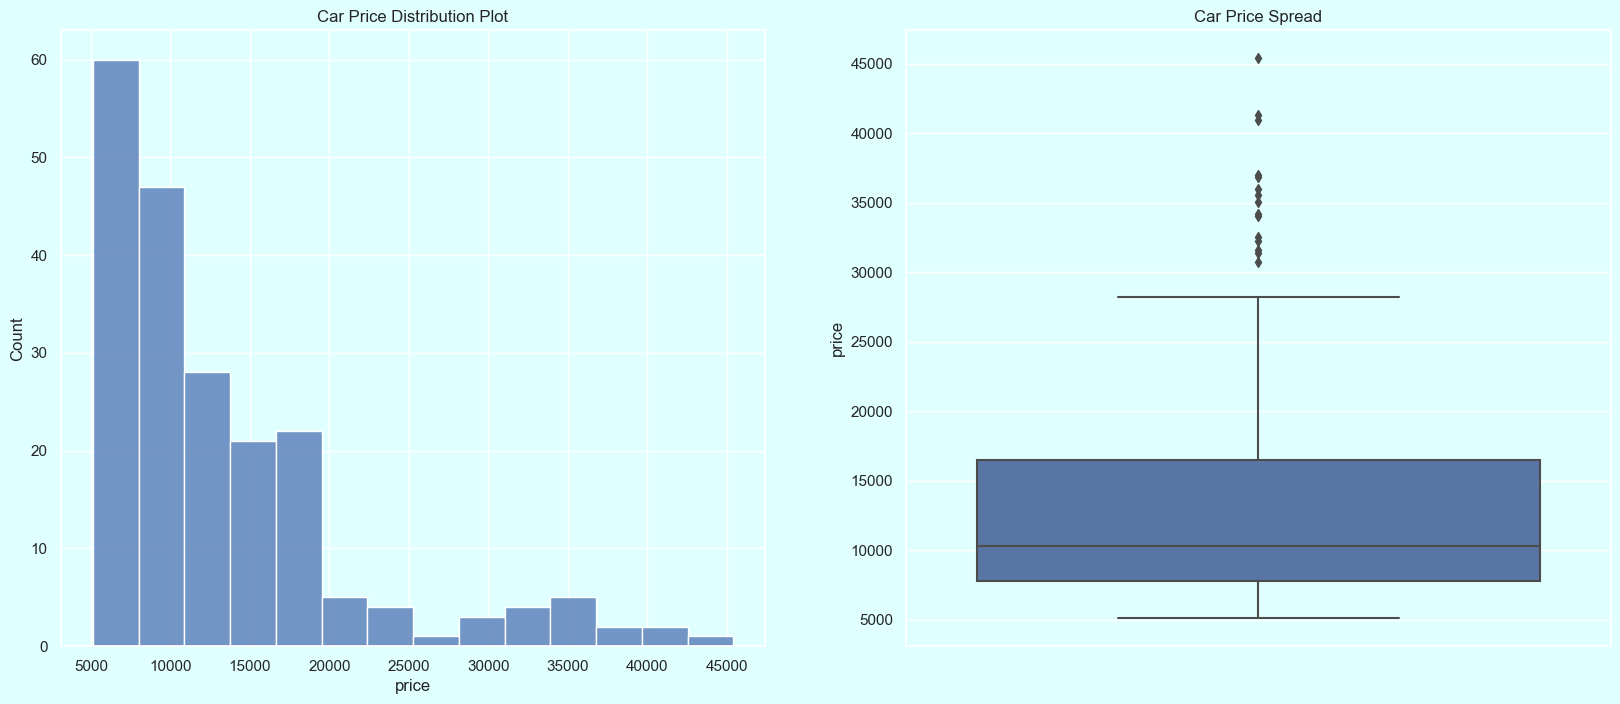

In [231]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.histplot(cars_df.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars_df.price)

plt.show()

THE price distribution is skewed

ANALYZING CATEGORICAL VARIABLES

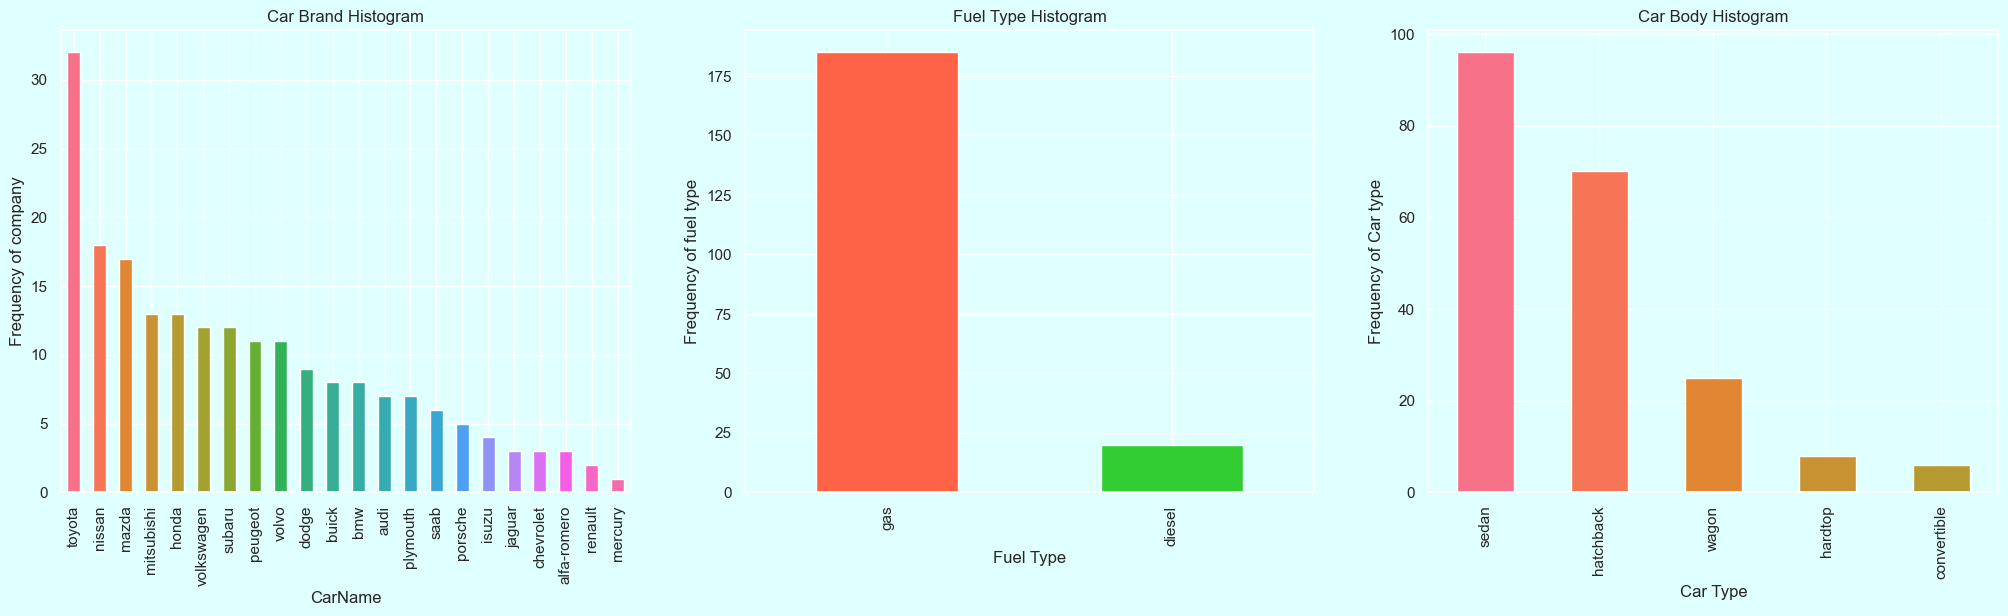

In [232]:
plt.figure(figsize=(25, 6))



# Get a unique color for each bar
colors = sns.color_palette("husl", n_colors=len(cars_df['CompanyName'].unique()))

plt.subplot(1, 3, 1)
plt1 = cars_df['CompanyName'].value_counts().plot(kind='bar', color=colors)
plt.title('Car Brand Histogram')
plt1.set(xlabel='CarName', ylabel='Frequency of company')

plt.subplot(1, 3, 2)
plt2 = cars_df['fueltype'].value_counts().plot(kind='bar', color=custom_palette)
plt.title('Fuel Type Histogram')
plt2.set(xlabel='Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1, 3, 3)
plt3 = cars_df['carbody'].value_counts().plot(kind='bar', color=colors)
plt.title('Car Body Histogram')
plt3.set(xlabel='Car Type', ylabel='Frequency of Car type')

plt.show()

Inference :
1. Toyota seemed to be favored car company.
2. Number of gas fueled cars are more than diesel.
3. Sedan is the most prefered carbody type.

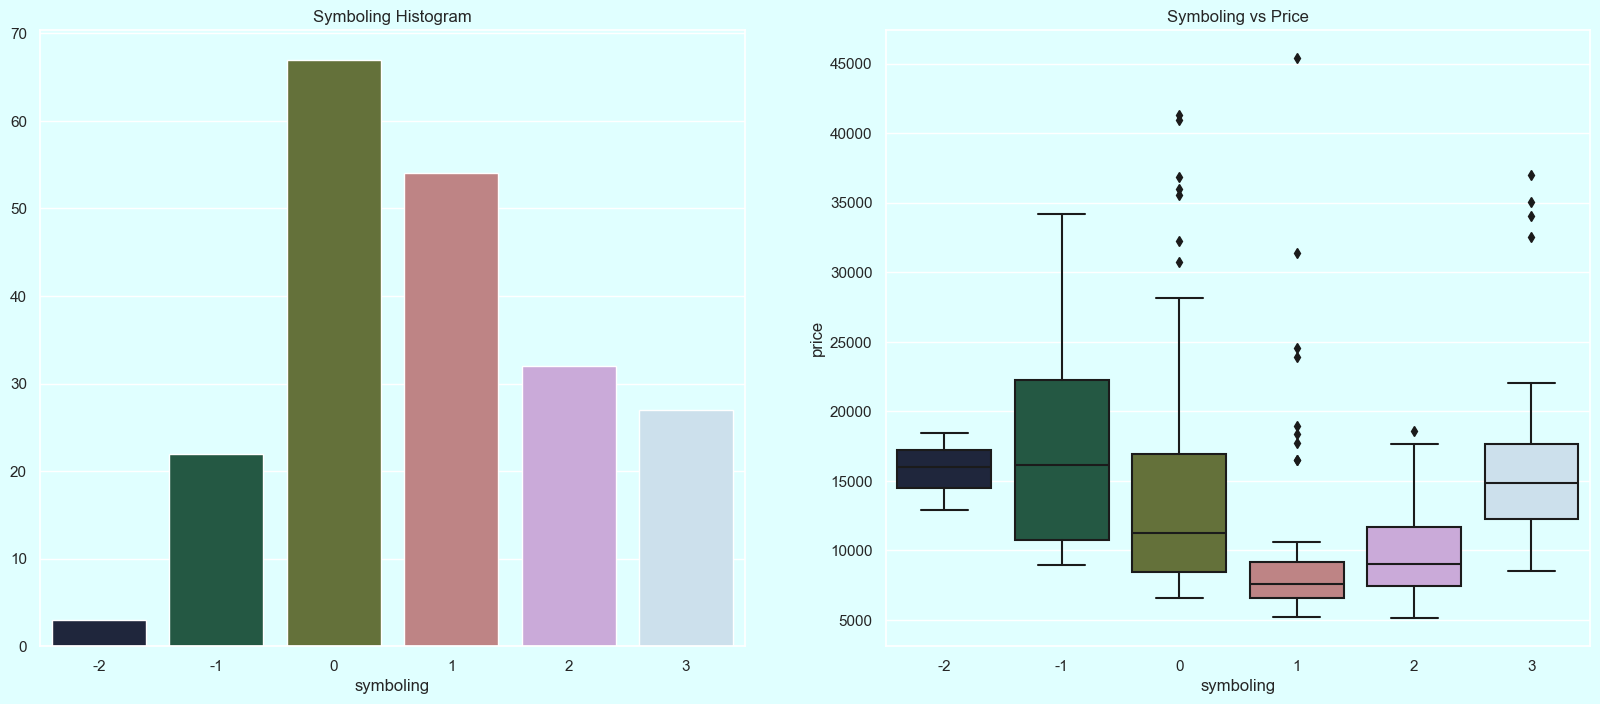

In [233]:
plt.figure(figsize=(20,8))

# Get value counts for 'symboling'
symboling_counts = cars_df['symboling'].value_counts()
# Plot the barplot with the 'cubehelix' color palette
plt.subplot(1, 2, 1)
plt.title('Symboling Histogram')
sns.barplot(x=symboling_counts.index, y=symboling_counts.values, palette="cubehelix")

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=cars_df.symboling, y=cars_df.price, palette=("cubehelix"))

plt.show()

Inference :

1. It seems that the symboling with 0 and 1 values have high number of rows (i.e. They are most sold.)
2. The cars with -1 symboling seems to be high priced (as it makes sense too, insurance risk rating -1 is quite good). But it seems that symboling    with 3 value has the price range similar to -2 value. There is a dip in price at symboling 1.

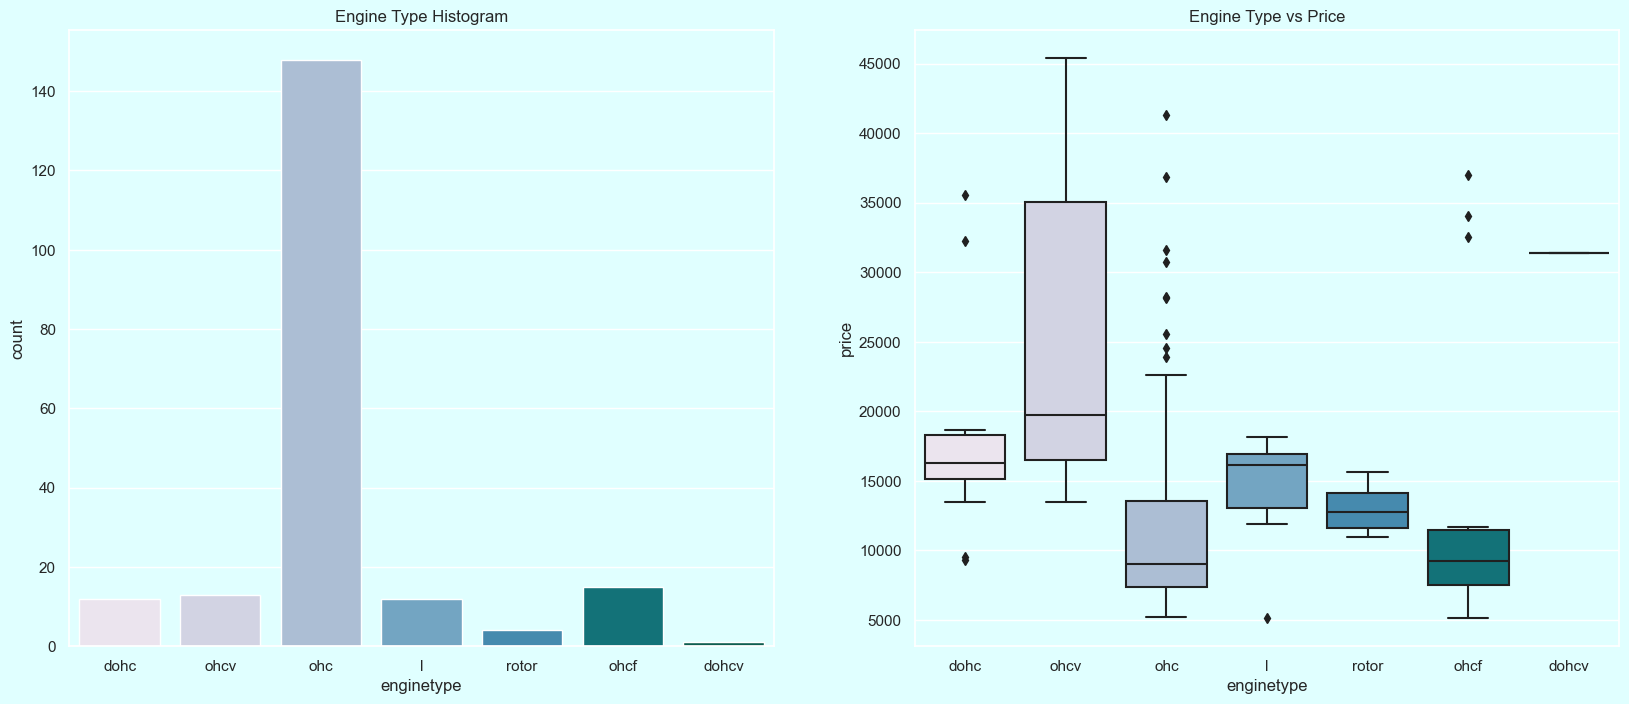

In [234]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)

plt.subplot(1, 2, 1)
plt.title('Engine Type Histogram')
sns.countplot(data=cars_df, x='enginetype', palette="PuBuGn")

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=cars_df.enginetype, y=cars_df.price, palette="PuBuGn")

plt.show()



Inference :
1. ohc Engine type seems to be most used type.
2. ohcv has the highest price range (While dohcv has only one row), ohc and ohcf have the low price range.


In [235]:
Ave_price_carbrand = cars_df.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False).reset_index()
Ave_price_fueltype = cars_df.groupby(['fueltype'])['price'].mean().sort_values(ascending = False).reset_index()
Ave_price_carbody = cars_df.groupby(['carbody'])['price'].mean().sort_values(ascending = False).reset_index()
Ave_price_engine = cars_df.groupby(['enginetype'])['price'].mean().sort_values(ascending=False).reset_index()


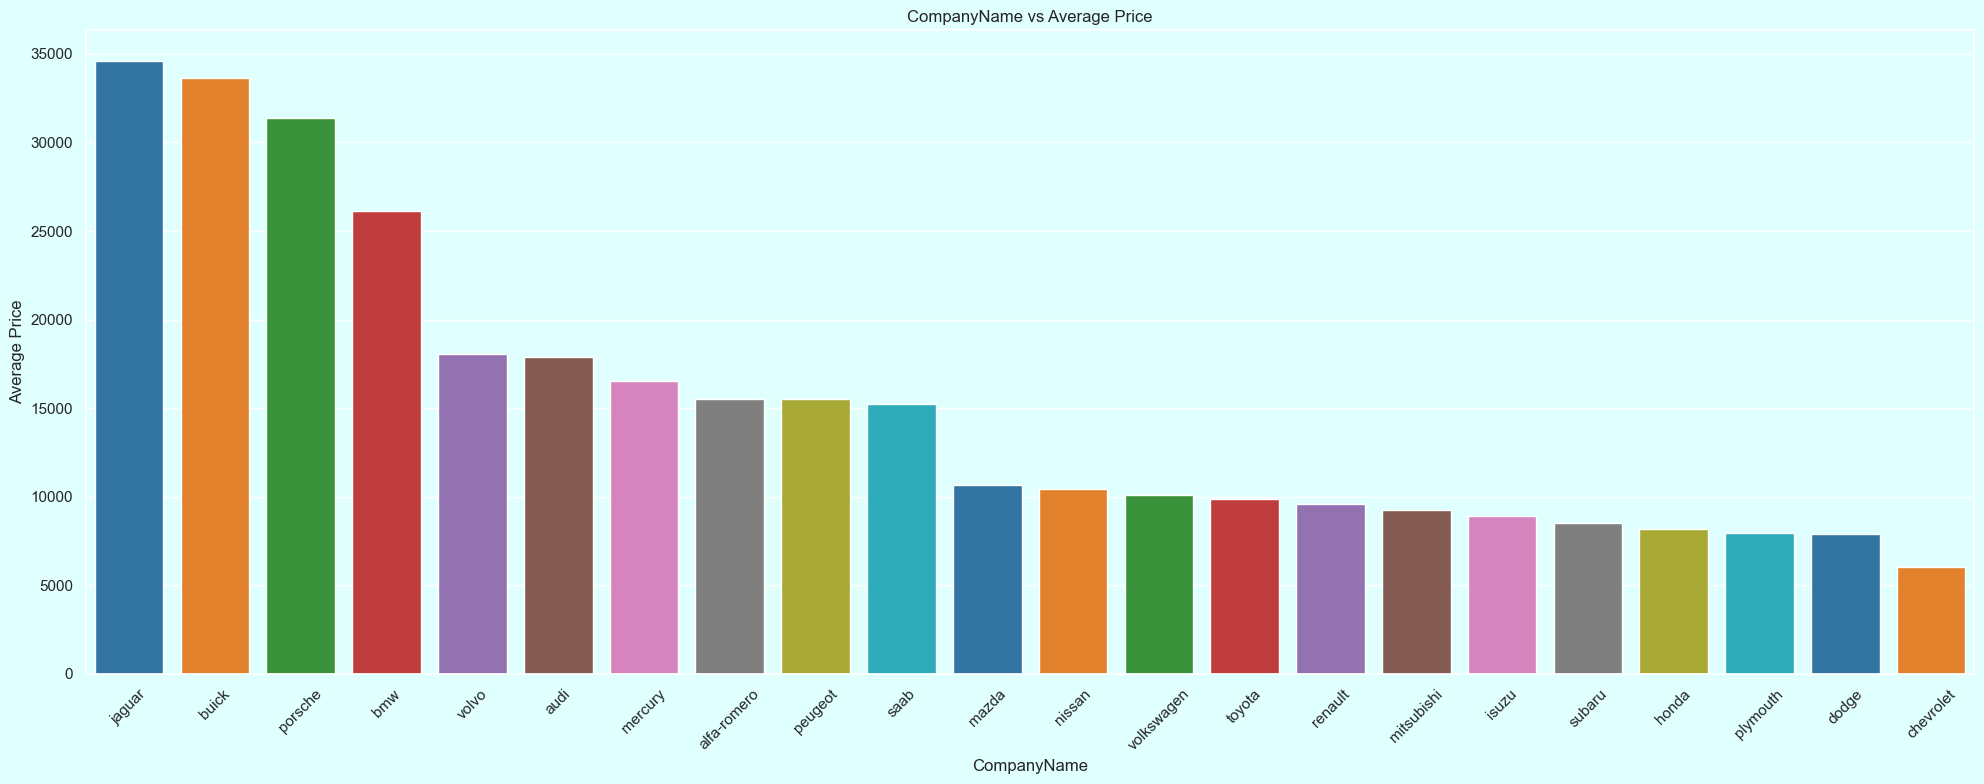

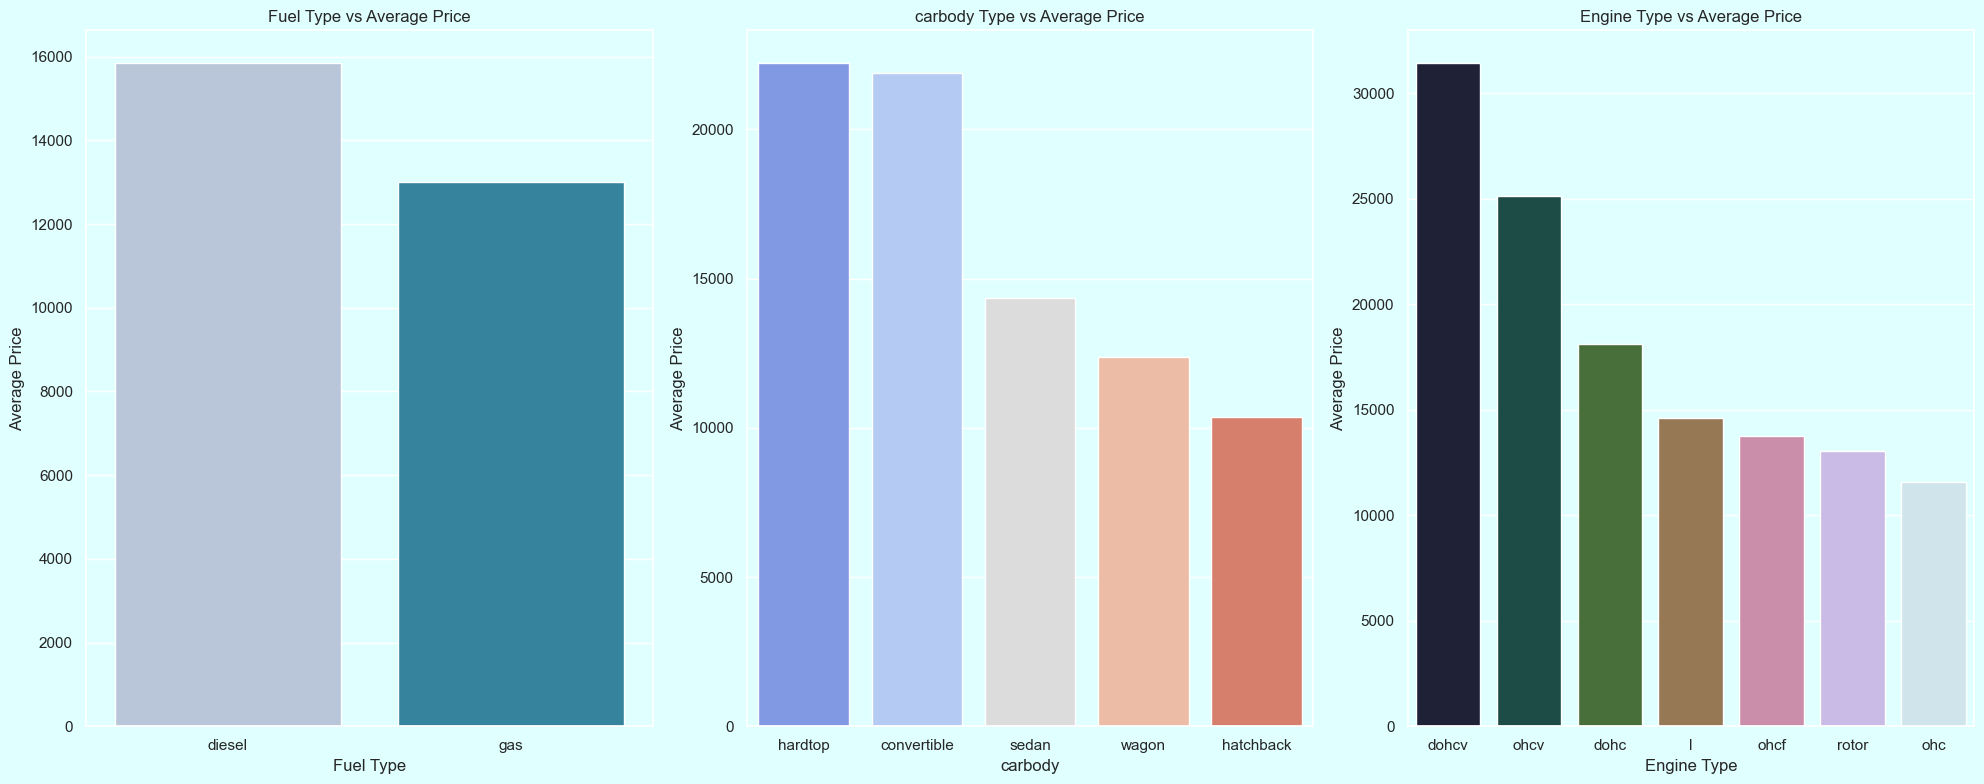

In [236]:

plt.figure(figsize=(20, 8))

# Plot CompanyName vs Average Price (separate and wider)
plt.subplot(1, 1, 1)
sns.barplot(x='CompanyName', y='price', data=Ave_price_carbrand, palette="tab10")
plt.title('CompanyName vs Average Price')
plt.xlabel('CompanyName')
plt.ylabel('Average Price')
plt.xticks(rotation=45)

plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()

#To Plot Fuel Type, carbody Type, and Engine Type vs Average Price (side by side)
plt.figure(figsize=(20, 8))

plt.subplot(1, 3, 1)
sns.barplot(x='fueltype', y='price', data=Ave_price_fueltype, palette="PuBuGn")
plt.title('Fuel Type vs Average Price')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')

plt.subplot(1, 3, 2)
sns.barplot(x='carbody', y='price', data=Ave_price_carbody, palette="coolwarm")
plt.title('carbody Type vs Average Price')
plt.xlabel('carbody')
plt.ylabel('Average Price')

plt.subplot(1, 3, 3)
sns.barplot(x='enginetype', y='price', data=Ave_price_engine, palette="cubehelix")
plt.title('Engine Type vs Average Price')
plt.xlabel('Engine Type')
plt.ylabel('Average Price')

plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()


Inference :
1. Jaguar appears ti suppass Buick as the highest average priced vehicle.
2. diesel vehicles have a higher average price than gas.
3. hardtop and convertible have higher average price.

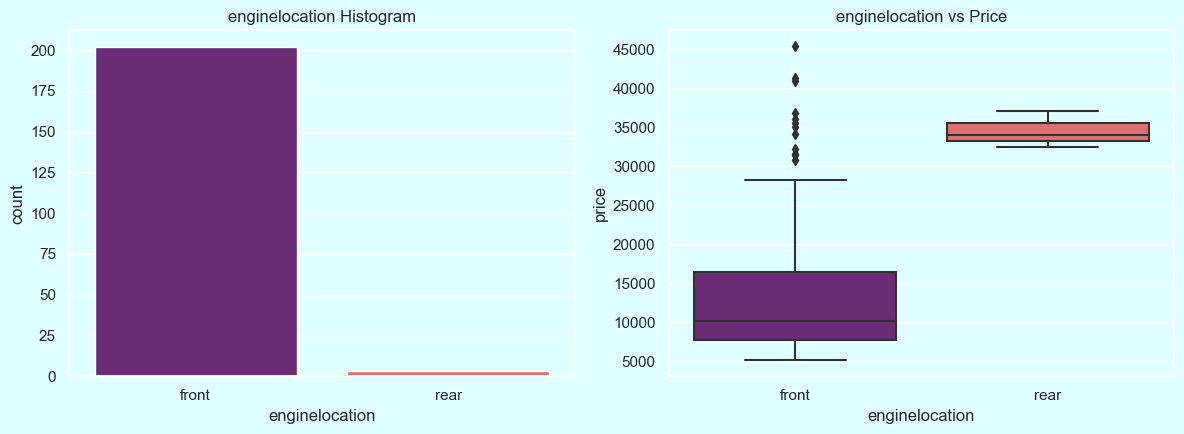

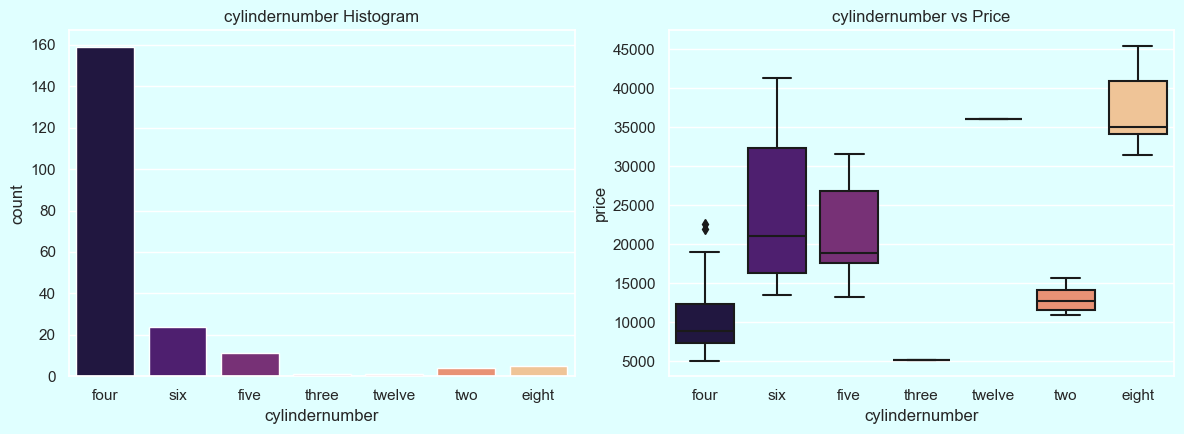

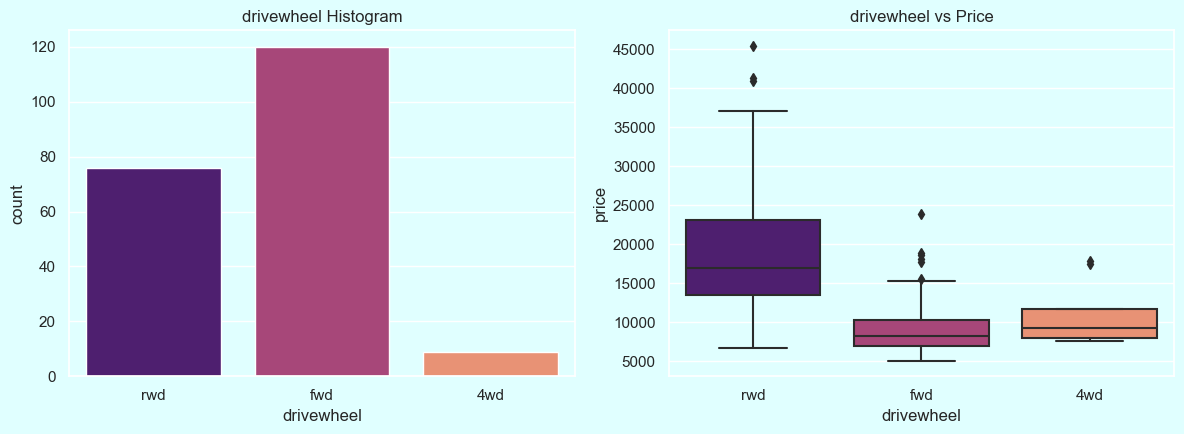

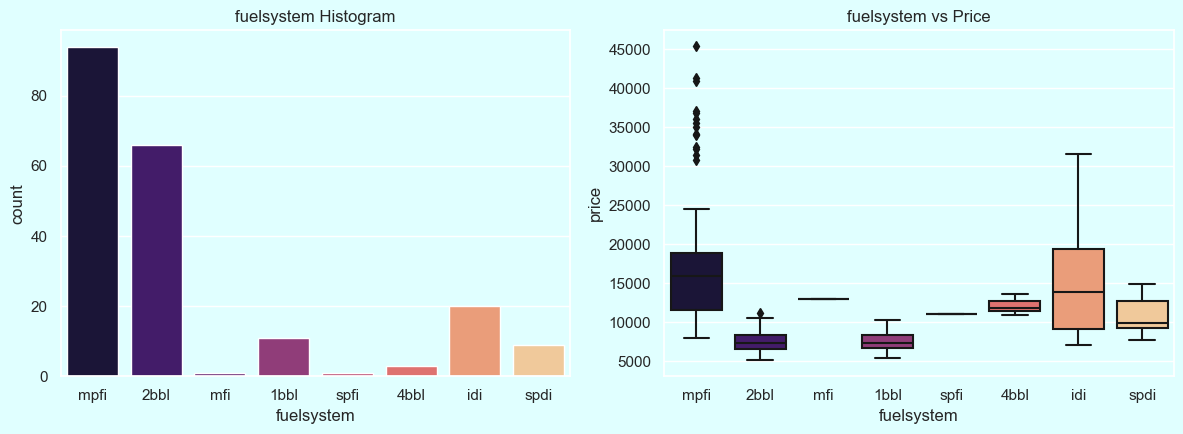

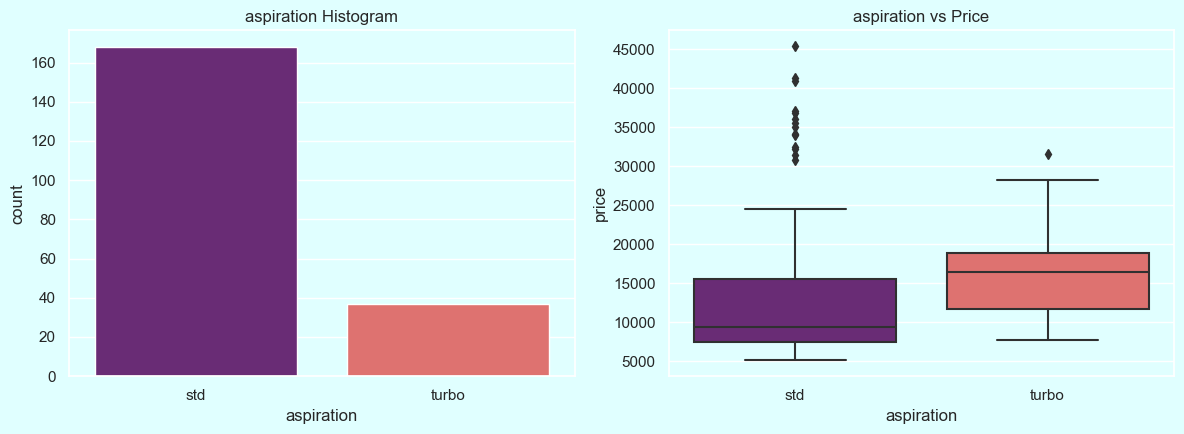

In [237]:

def plot_count_and_box(x):
    plt.figure(figsize=(12, 4.5))

    # Countplot
    plt.subplot(1, 2, 1)
    plt.title(f'{x} Histogram')
    sns.countplot(data=cars_df, x=x, palette="magma")

    # Boxplot
    plt.subplot(1, 2, 2)
    plt.title(f'{x} vs Price')
    sns.boxplot(x=x, y='price', data=cars_df, palette="magma")

    plt.tight_layout()
    plt.show()

# Example usage
plot_count_and_box('enginelocation')
plot_count_and_box('cylindernumber')
plot_count_and_box('drivewheel')
plot_count_and_box('fuelsystem')
plot_count_and_box('aspiration')

The coubt of the rear categories in the engine location variabke is too low to take the variable serious. Although there's some relationship with the price

engine location as a variable is dispensable

ANALYZING NUMERICAL COLUMNS

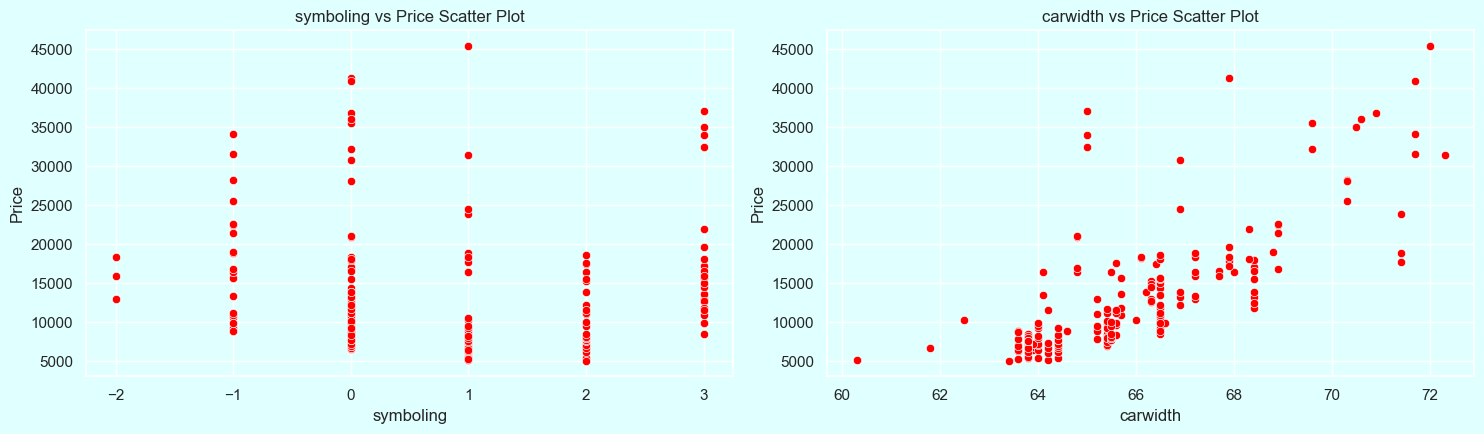

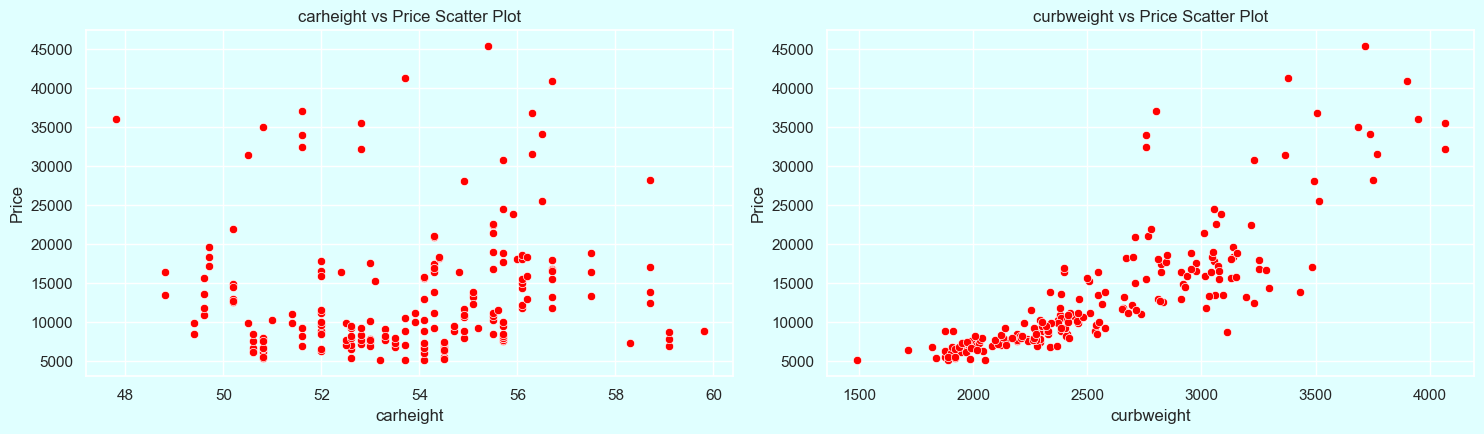

In [240]:
def scatterplot(x, y):
    plt.figure(figsize=(15, 4.5))

    # Scatterplot for 'carlength' and 'carwidth' side by side
    plt.subplot(1, 2, 1)
    plt.title(f'{x} vs Price Scatter Plot')
    sns.scatterplot(data=cars_df, x=x, y='price', color="red")
    plt.xlabel(x)
    plt.ylabel('Price')

    # Scatterplot for 'carheight' and 'curbweight' side by side
    plt.subplot(1, 2, 2)
    plt.title(f'{y} vs Price Scatter Plot')
    sns.scatterplot(data=cars_df, x=y, y='price', color="red")
    plt.xlabel(y)
    plt.ylabel('Price')

    plt.tight_layout()
    plt.show()

# Example usage
scatterplot('symboling', 'carwidth')
scatterplot('carheight', 'curbweight')


It is obvious that the car height shows no correlation with price, while we see some form of positive correlation with the rest.
And also symboling shows no significant correlation with the price

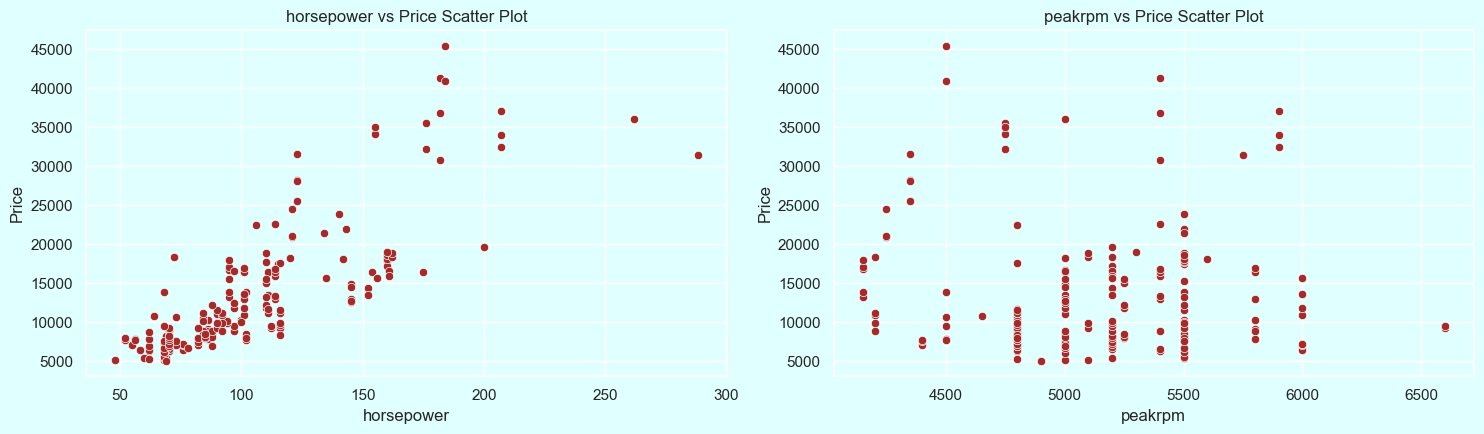

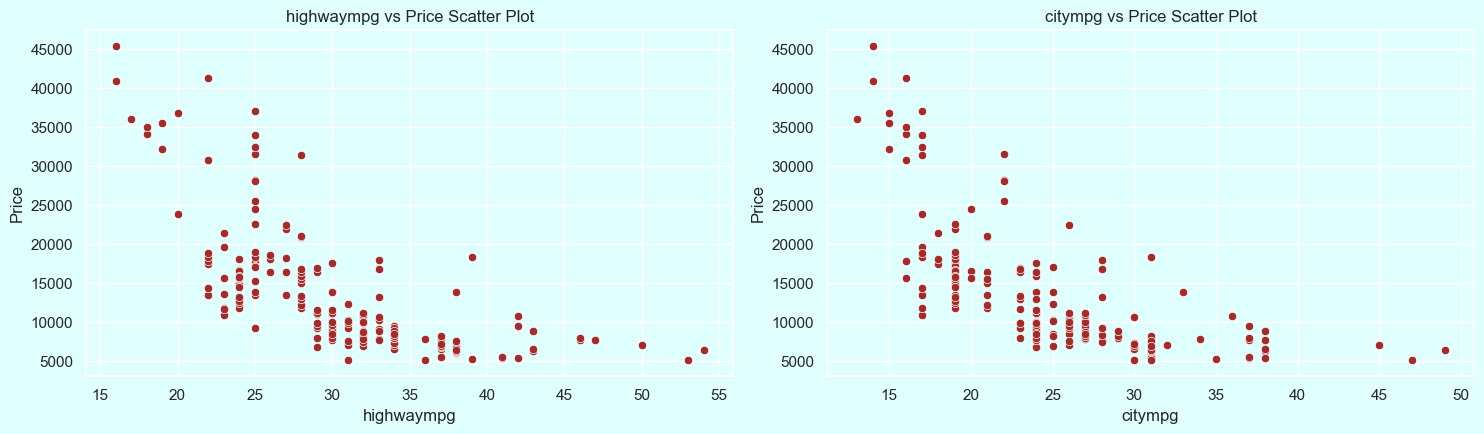

In [243]:
def scatterplot(x, y):
    plt.figure(figsize=(15, 4.5))

    # Scatterplot for 'carlength' and 'carwidth' side by side
    plt.subplot(1, 2, 1)
    plt.title(f'{x} vs Price Scatter Plot')
    sns.scatterplot(data=cars_df, x=x, y='price', color="brown")
    plt.xlabel(x)
    plt.ylabel('Price')

    # Scatterplot for 'carheight' and 'curbweight' side by side
    plt.subplot(1, 2, 2)
    plt.title(f'{y} vs Price Scatter Plot')
    sns.scatterplot(data=cars_df, x=y, y='price', color="brown")
    plt.xlabel(y)
    plt.ylabel('Price')

    plt.tight_layout()
    plt.show()

# Example usage
scatterplot('horsepower', 'peakrpm')
scatterplot('highwaympg', 'citympg')


We notice negative correlation in highwaympg and citympg

We also peakrpm isn't showing any form of correlatiion with price. Hence we remove it.


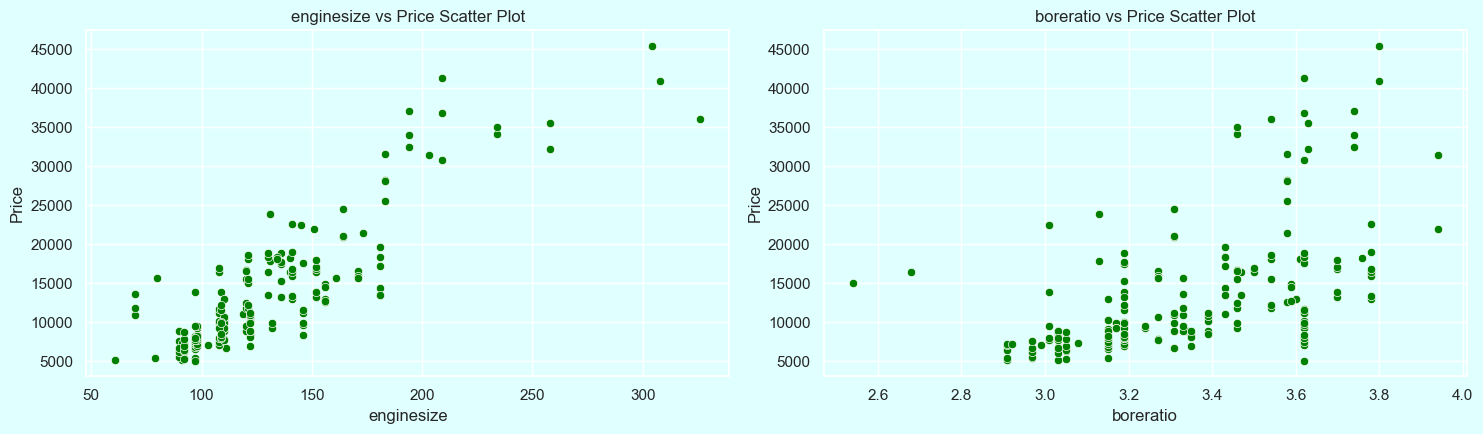

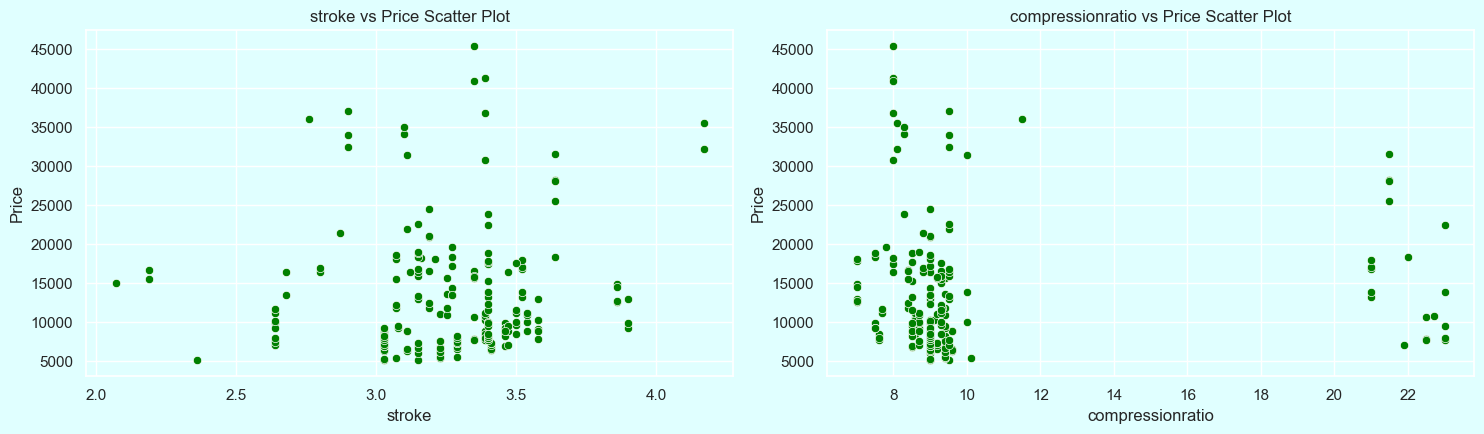

In [244]:
def scatterplot(x, y):
    plt.figure(figsize=(15, 4.5))

    # Scatterplot for 'carlength' and 'carwidth' side by side
    plt.subplot(1, 2, 1)
    plt.title(f'{x} vs Price Scatter Plot')
    sns.scatterplot(data=cars_df, x=x, y='price', color="green")
    plt.xlabel(x)
    plt.ylabel('Price')

    # Scatterplot for 'carheight' and 'curbweight' side by side
    plt.subplot(1, 2, 2)
    plt.title(f'{y} vs Price Scatter Plot')
    sns.scatterplot(data=cars_df, x=y, y='price', color="green")
    plt.xlabel(y)
    plt.ylabel('Price')

    plt.tight_layout()
    plt.show()

# Example usage
scatterplot('enginesize', 'boreratio')
scatterplot('stroke', 'compressionratio')


stroke and compressionratio shows no significant correlation with price.

FEATURE SELECTION

In [245]:
categorical = ['CompanyName', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem']

In [246]:
numerical = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg']

In [247]:
# Drop 'Car ID' column
cars_df = cars_df.drop(columns=['car_ID'])

SPLITTING

In [248]:
X = cars_df.drop(['price'], axis=1)
Y = cars_df['price']

In [249]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [250]:
X_train.shape

(164, 24)

In [251]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [252]:
# Define transformers for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply the appropriate transformations to each column
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical),
        ('cat', categorical_transformer, categorical)
    ])

# Define the pipeline for preprocessing
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the training data
X_train_preprocessed = pipeline.fit_transform(X_train)

# Transform the testing data using the same preprocessing steps
X_test_preprocessed = pipeline.transform(X_test)


In [253]:
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
model = LinearRegression()

# Train the model on preprocessed training data
model.fit(X_train_preprocessed, y_train)

LinearRegression()

In [254]:
from sklearn.metrics import mean_squared_error

# Make predictions on the preprocessed testing data
y_pred = model.predict(X_test_preprocessed)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 2804.3114839208133


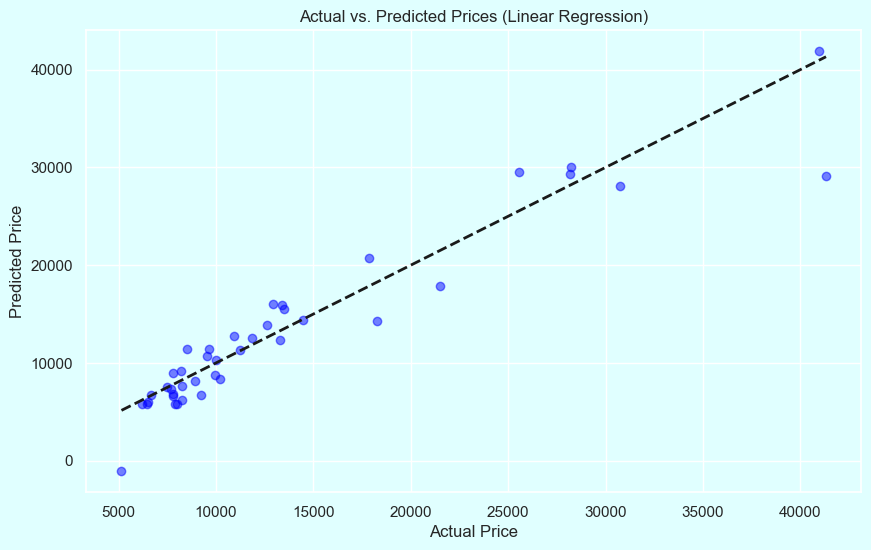

In [255]:
# Make predictions on the testing data
y_pred = model.predict(X_test_preprocessed)

# Create a scatter plot of actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Regression line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices (Linear Regression)')
plt.grid(True)
plt.show()


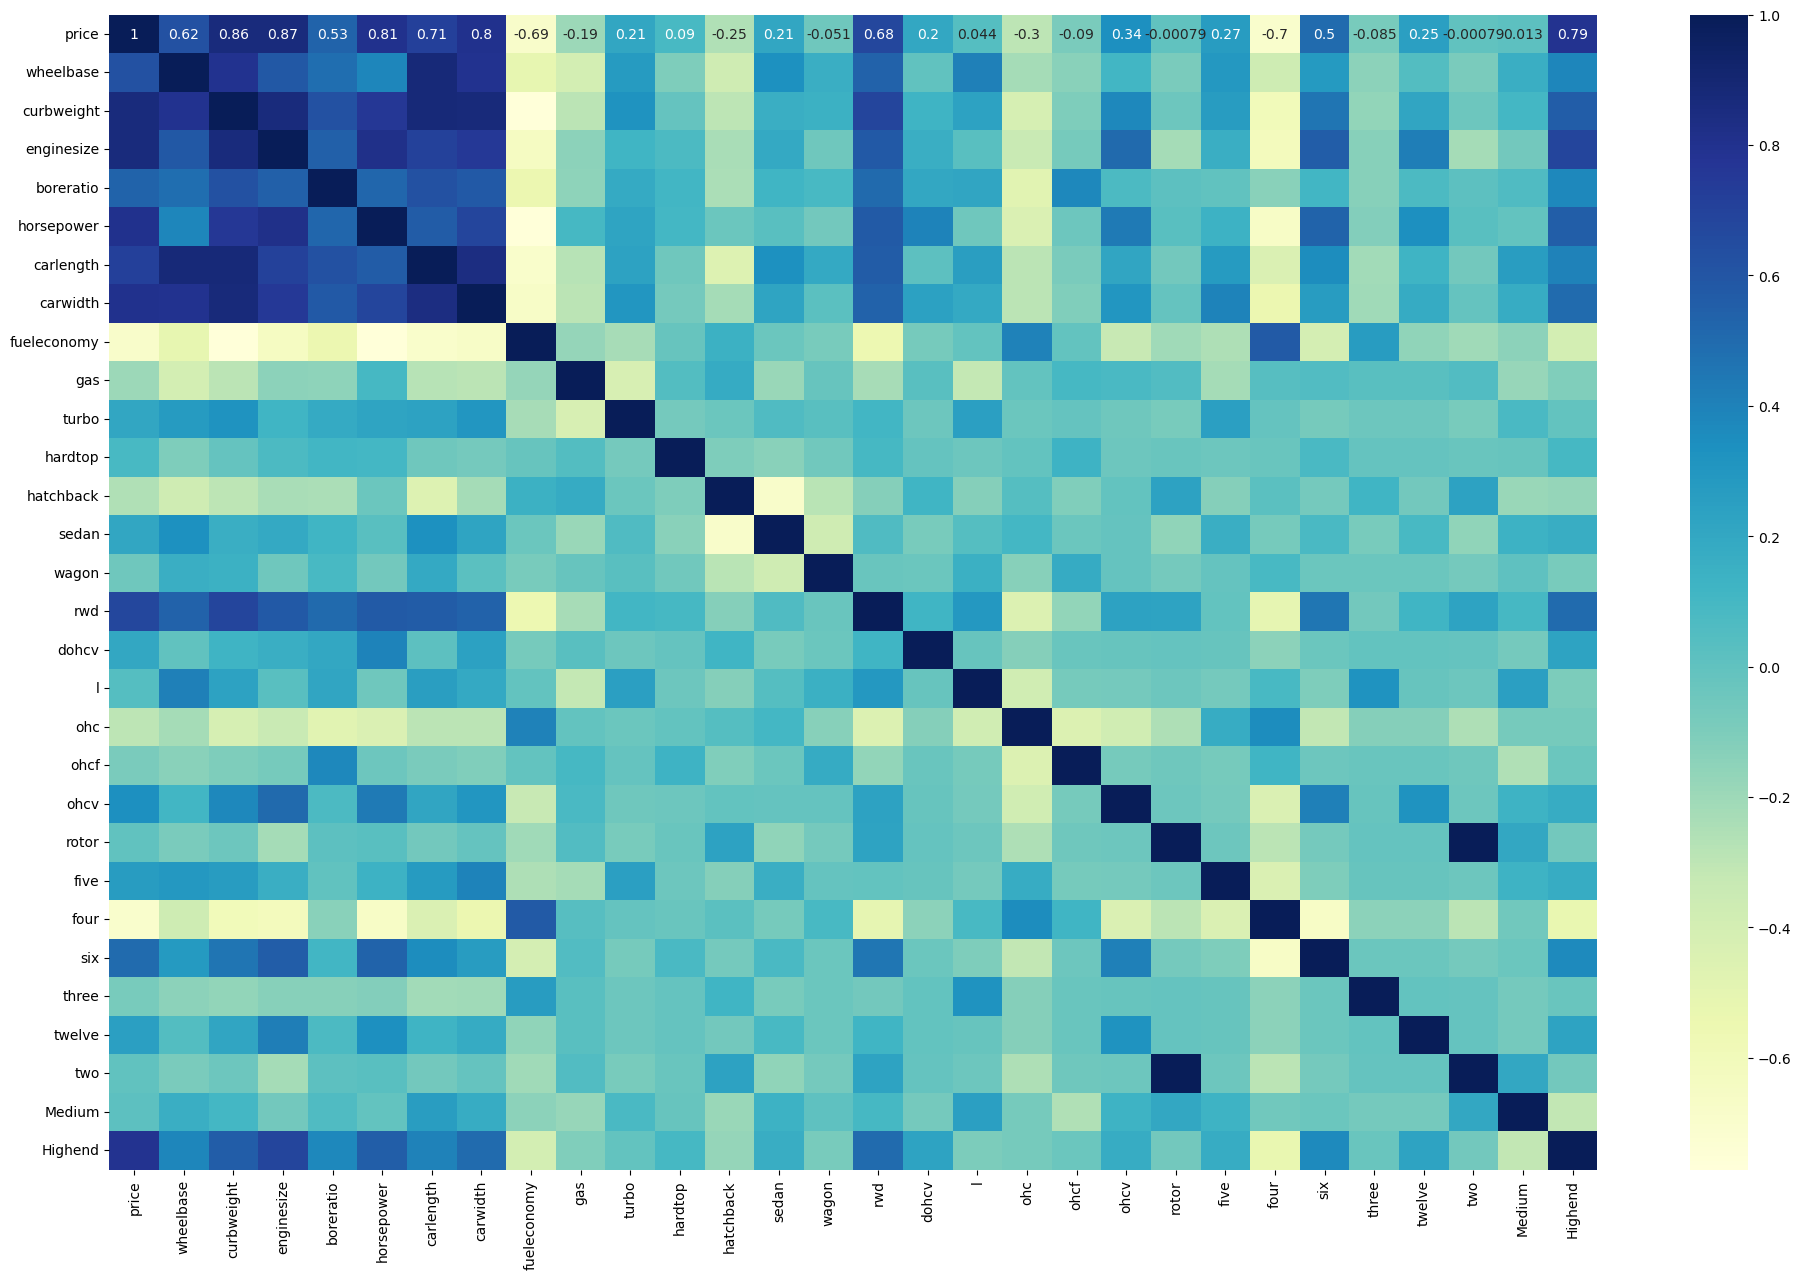

In [62]:
#Correlation using heatmap
plt.figure(figsize = (24, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()